<a href="https://colab.research.google.com/github/mgarbanzo/tallerCienciasGOES16/blob/master/TALLER_GLM_para_Estudiantes_de_Ciencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install netCDF4

     |████████████████████████████████| 4.3MB 2.8MB/s 
     |████████████████████████████████| 296kB 33.8MB/s 


In [ ]:
%matplotlib inline
import numpy as np

In [ ]:
import pylab as plt

In [ ]:
from netCDF4 import Dataset

In [ ]:
!wget https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2020/263/20/OR_GLM-L2-LCFA_G16_s20202632032400_e20202632033000_c20202632033025.nc

--2020-09-24 03:35:00--  https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2020/263/20/OR_GLM-L2-LCFA_G16_s20202632032400_e20202632033000_c20202632033025.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.169.35
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.169.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 493611 (482K) [binary/octet-stream]
Saving to: ‘OR_GLM-L2-LCFA_G16_s20202632032400_e20202632033000_c20202632033025.nc’

OR_GLM-L2-LCFA_G16_ 100%[===================>] 482.04K   656KB/s    in 0.7s    

2020-09-24 03:35:01 (656 KB/s) - ‘OR_GLM-L2-LCFA_G16_s20202632032400_e20202632033000_c20202632033025.nc’ saved [493611/493611]



In [ ]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPM/2020/228/13/OR_ABI-L2-CMIPM1-M6C01_G16_s20202281330277_e20202281330334_c20202281330394.nc

--2020-09-24 03:45:16--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPM/2020/228/13/OR_ABI-L2-CMIPM1-M6C01_G16_s20202281330277_e20202281330334_c20202281330394.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.20.131
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.20.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1229773 (1.2M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPM1-M6C01_G16_s20202281330277_e20202281330334_c20202281330394.nc’

OR_ABI-L2-CMIPM1-M6 100%[===================>]   1.17M  1.06MB/s    in 1.1s    

2020-09-24 03:45:18 (1.06 MB/s) - ‘OR_ABI-L2-CMIPM1-M6C01_G16_s20202281330277_e20202281330334_c20202281330394.nc’ saved [1229773/1229773]



In [ ]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C03_G16_s20202581800184_e20202581809492_c20202581809594.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C01_G16_s20202581800184_e20202581809492_c20202581810002.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C02_G16_s20202581800184_e20202581809492_c20202581809590.nc

--2020-09-24 03:52:59--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C03_G16_s20202581800184_e20202581809492_c20202581809594.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.26.68
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.26.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105688607 (101M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C03_G16_s20202581800184_e20202581809492_c20202581809594.nc.1’

OR_ABI-L2-CMIPF-M6C 100%[===================>] 100.79M  16.9MB/s    in 7.2s    

2020-09-24 03:53:07 (13.9 MB/s) - ‘OR_ABI-L2-CMIPF-M6C03_G16_s20202581800184_e20202581809492_c20202581809594.nc.1’ saved [105688607/105688607]

--2020-09-24 03:53:07--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C01_G16_s20202581800184_e20202581809492_c20202581810002.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com

In [ ]:
ncGLM = Dataset("/content/OR_GLM-L2-LCFA_G16_s20202632032400_e20202632033000_c20202632033025.nc")
ncABIC1 = Dataset("/content/OR_ABI-L2-CMIPF-M6C01_G16_s20202581800184_e20202581809492_c20202581810002.nc")
ncABIC2 = Dataset("/content/OR_ABI-L2-CMIPF-M6C02_G16_s20202581800184_e20202581809492_c20202581809590.nc")
ncABIC3 = Dataset("/content/OR_ABI-L2-CMIPF-M6C03_G16_s20202581800184_e20202581809492_c20202581809594.nc")

In [ ]:
ncABIC2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 0.5km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-CMIPF-M6C02_G16_s20202581800184_e20202581809492_c20202581809590.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    title: ABI L2 Cloud and Moisture Imagery
    summary: Single reflective band Cloud and Moisture Imagery Produc

In [ ]:
CH2 = ncABIC2.variables['CMI']

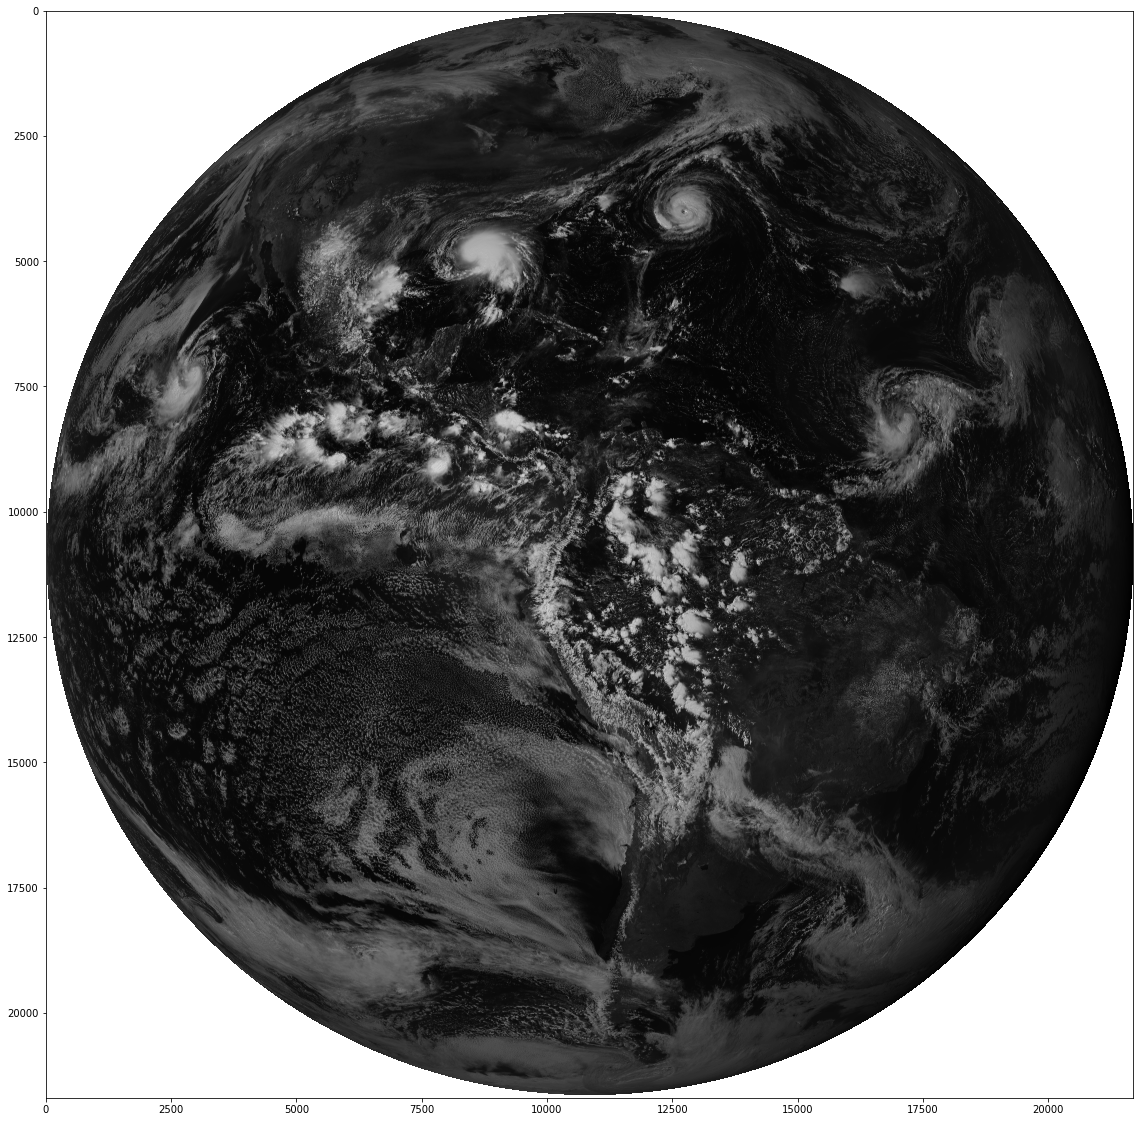

In [ ]:
fig, ax = plt.subplots(1,figsize=(20,20))
plt.imshow(CH2,cmap='gray')

In [ ]:
print(nc.variables['event_count'][:],nc.variables['group_count'][:],nc.variables['flash_count'][:])

12105 5777 546


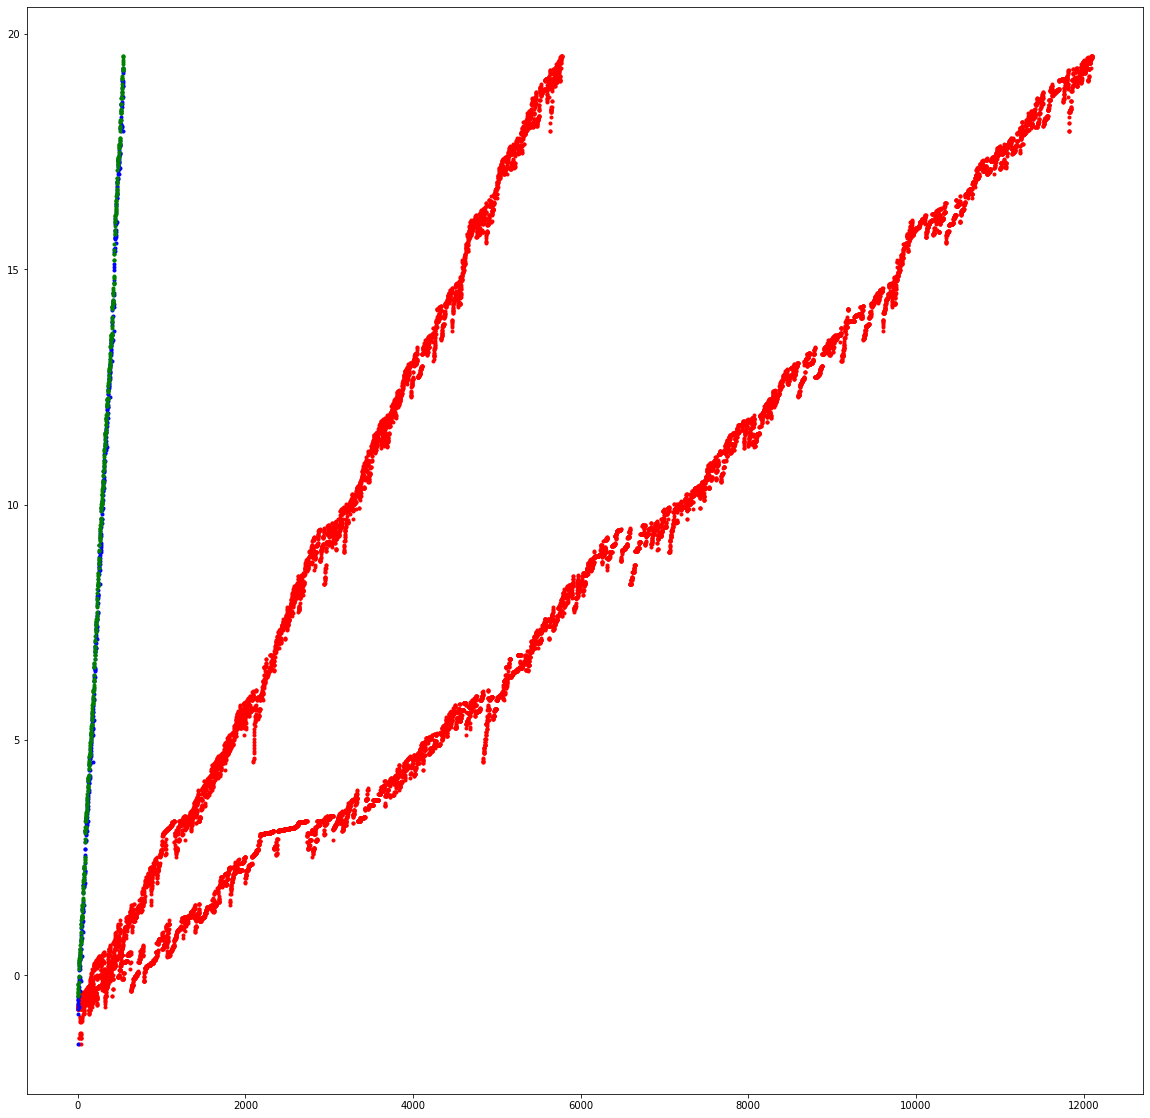

In [ ]:
e_offsets = nc.variables['event_time_offset'][:]
g_offsets = nc.variables['group_time_offset'][:]
ff_offsets = nc.variables['flash_time_offset_of_first_event'][:]
fl_offsets = nc.variables['flash_time_offset_of_last_event'][:]



fig, ax = plt.subplots(1,figsize=(20,20))
ax.plot(e_offsets,'.r')
ax.plot(g_offsets,'.r')
ax.plot(ff_offsets,'.b')
ax.plot(fl_offsets,'.g')

In [ ]:
e_lats = nc.variables['event_lat'][:]
e_lons = nc.variables['event_lon'][:]

g_lats = nc.variables['group_lat'][:]
g_lons = nc.variables['group_lon'][:]

f_lats = nc.variables['flash_lat'][:]
f_lons = nc.variables['flash_lon'][:]
f_area = nc.variables['flash_area'][:]
f_ener = nc.variables['flash_energy'][:]

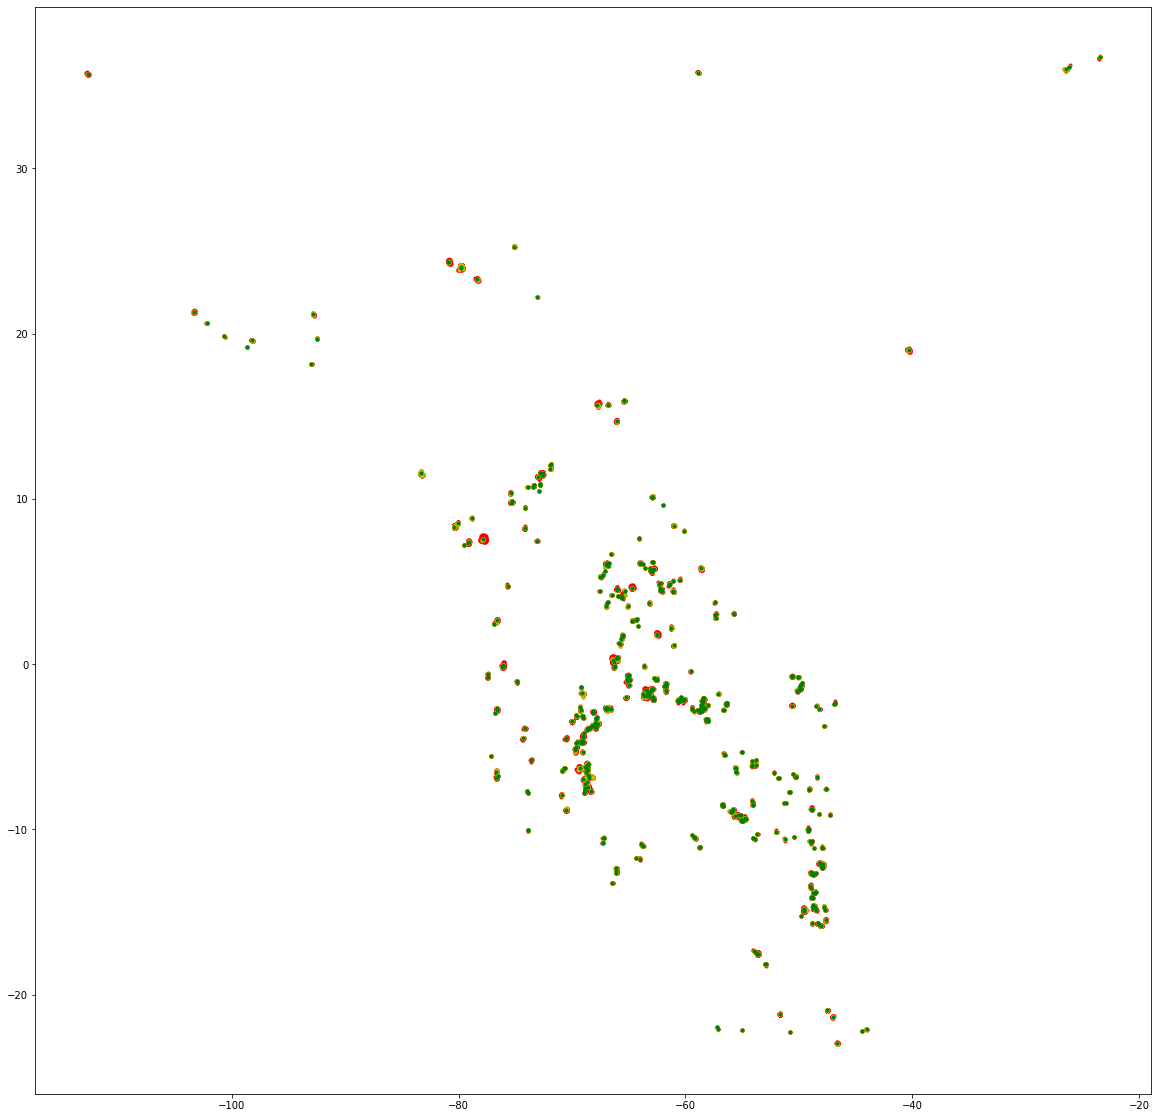

In [ ]:
fig, ax = plt.subplots(1,figsize=(20,20))
ax.plot(e_lons,e_lats,'.r')
ax.plot(g_lons,g_lats,'.y')
ax.plot(f_lons,f_lats,'.g')

In [ ]:
import pandas as pd  

dict = {'fLat': f_lats, 'fLon': f_lons, 'fArea': f_area, 'fEner': f_ener}  
    
df = pd.DataFrame(dict) 

In [ ]:
df

,fLat,fLon,fArea,fEner
0,-2.680684,-69.676353,583091712.0,1.432846e-13
1,5.457596,-74.176033,129253776.0,1.228510e-14
2,-22.265106,-57.480877,360292992.0,8.128483e-14
3,-6.540746,-69.581062,457652992.0,4.792832e-13
4,-7.024543,-68.695229,262627792.0,6.228490e-14
...,...,...,...,...
541,1.439209,-69.622551,258812752.0,1.962844e-13
542,0.429406,-69.486870,64703188.0,4.228498e-14
543,-12.443325,-71.907730,334350688.0,3.402838e-13
544,8.279994,-62.423424,407141760.0,2.732841e-13


In [ ]:
# NEO ESCRIBIENDO EN MIS NOTEBOOKS
# tbguhj

In [ ]:
from vega_datasets import data

import altair as alt
alt.Chart(df).mark_point().encode(
  x='fLon',
  y='fLat',
  color='fEner',
  size='fArea',
  tooltip=['fLat', 'fLon', 'fArea', 'fEner']
).interactive(bind_y=False)

alt.Chart(...)